## Cosmological Emulator

In this example, we will calculate the matter power spectrum using Cosmological Emulator such as MiraTitan and BaccoEmu.

In [1]:
import pyccl as ccl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
plt.rcParams['figure.figsize']=(6.5,5.5)
np.set_printoptions(linewidth=120)
np.get_printoptions()

{'edgeitems': 3,
 'threshold': 1000,
 'floatmode': 'maxprec',
 'precision': 8,
 'suppress': False,
 'linewidth': 120,
 'nanstr': 'nan',
 'infstr': 'inf',
 'sign': '-',
 'formatter': None,
 'legacy': False}

### baccoemu

These below sentenses are based on https://baccoemu.readthedocs.io/en/latest/#

We begin the range of wavenumber and redshift.
you can check the k-range on which the linear/non-linear emulator is defined you can type

In [3]:
import baccoemu
emulator = baccoemu.Matter_powerspectrum()
k_range_lin = emulator.emulator['linear']['k']
k_range_nl = emulator.emulator['nonlinear']['k']

2023-08-28 17:02:06.208125: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/home/ishikawa/.conda/envs/ccl-dev/lib/python3.8/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishikawa/.conda/envs/ccl-dev/lib/python3.8/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishikawa/.conda/envs/ccl-dev/lib/python3.8/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/home/ishikawa/.conda/envs/ccl-dev/lib/python3.8/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/home/ishikawa/.conda/envs/ccl-dev/lib/python3.8/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishikawa/.conda/envs/ccl-dev/lib/python3.8/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/home/ishikawa/.conda/envs/ccl-dev/lib/python3.8/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishikawa/.conda/envs/ccl-dev/lib/python3.8/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [4]:
print("linear:", "min:", min(k_range_lin), "[h/Mpc]", "max:", max(k_range_lin), "[h/Mpc]")
print("non-linear:", "min:", min(k_range_nl), "[h/Mpc]", "max:", max(k_range_nl), "[h/Mpc]")

linear: min: 0.0001 [h/Mpc] max: 49.99999999999999 [h/Mpc]
non-linear: min: 0.010197349385252722 [h/Mpc] max: 4.903235148249275 [h/Mpc]


In [5]:
kmin, kmax, nk = min(k_range_nl), max(k_range_nl), 128
k_bemu = np.logspace(np.log10(kmin*0.67), np.log10(kmax*0.67), nk) # Wavenumber [Mpc]^-1
a = 1. # Scale factor a z=0

In [6]:
bemu_lin = ccl.BaccoemuLinear()
cosmo_lin = ccl.Cosmology(Omega_c=0.27, Omega_b=0.05, h=0.67, n_s=0.96, sigma8=0.83,
                      m_nu=0.1, transfer_function='boltzmann_camb',
                      matter_power_spectrum=bemu_lin)

Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...
Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


In [7]:
bemu_nl = ccl.BaccoemuNonlinear()
cosmo_nl = ccl.Cosmology(Omega_c=0.27, Omega_b=0.05, h=0.67, n_s=0.96, sigma8=0.83,
                      m_nu=0.1, transfer_function='boltzmann_camb',
                      matter_power_spectrum=bemu_nl)

Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...
Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


In [8]:
# Plot linear and nonlinear power spectra
pk_lin_bemu = cosmo_lin.get_linear_power()
pk_nl_bemu = cosmo_nl.get_nonlin_power()

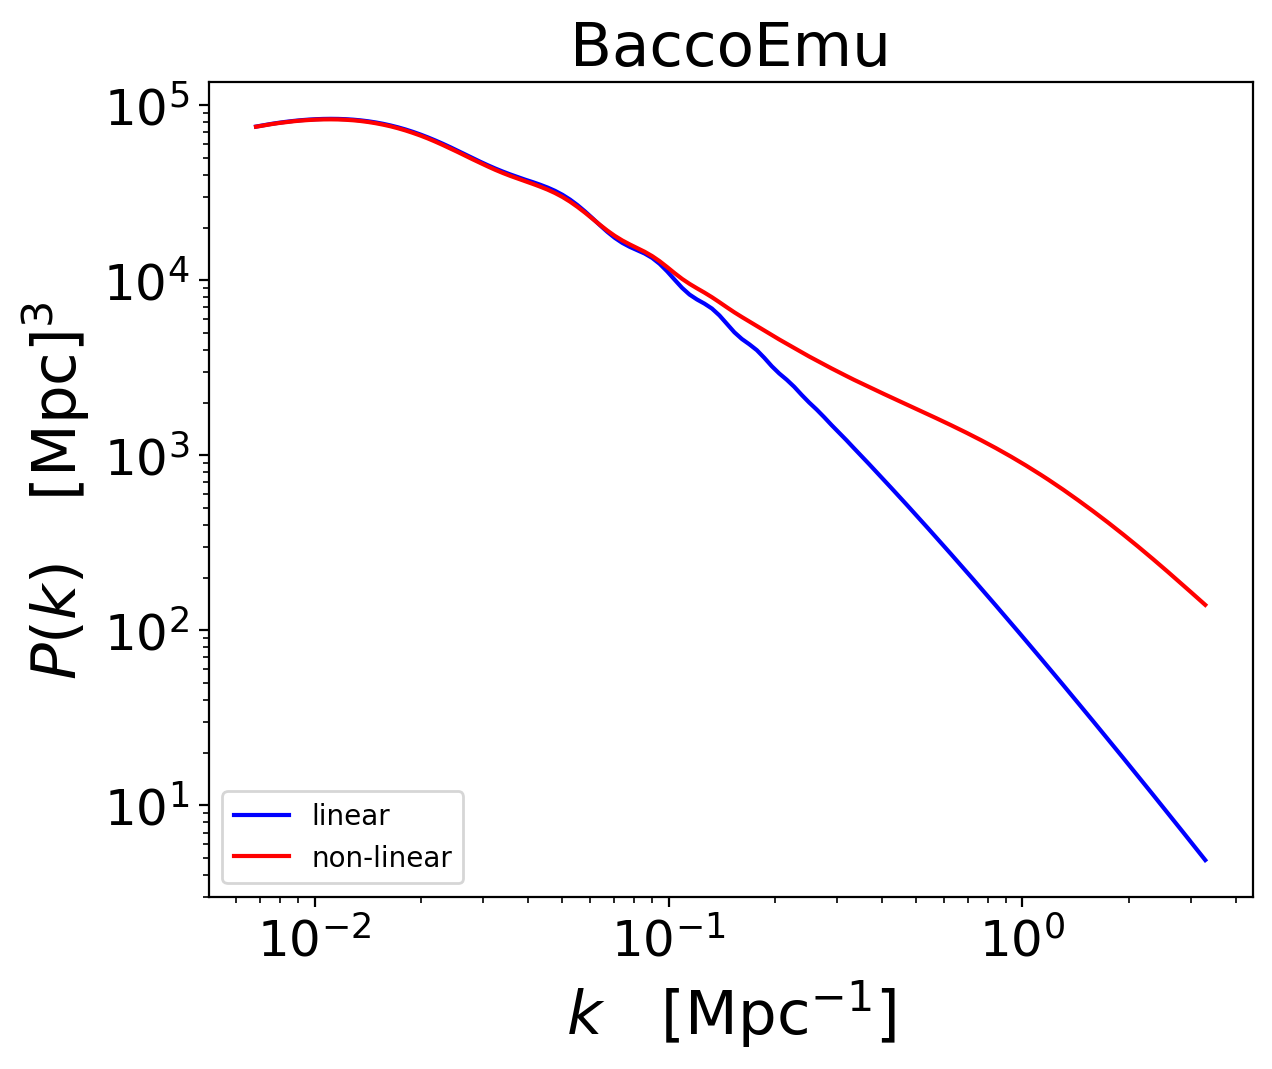

In [9]:
plt.plot(k_bemu, pk_lin_bemu(k_bemu, a), 'b-', label="linear")
plt.plot(k_bemu, pk_nl_bemu(k_bemu, a), 'r-', label="non-linear")

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='lower left',fontsize=10)
plt.xlabel('$k\quad[\\rm Mpc^{-1}]$', fontsize=22)
plt.ylabel('$P(k)\quad[{\\rm Mpc}]^3$', fontsize=22)
plt.title("BaccoEmu", fontsize=22)

plt.tight_layout()
plt.show()

### baccoemu baryon-corrected matter power spectrum emulator

you can also compute the baryon corrected power spectrum emulator.

In [10]:
# bemu_nl = ccl.BaccoemuNonlinear()
# cosmo_nl = ccl.Cosmology(Omega_c=0.27, Omega_b=0.05, h=0.67, n_s=0.96, sigma8=0.83,
#                       m_nu=0.1, transfer_function='boltzmann_camb',
#                       matter_power_spectrum=bemu_nl)
baryons = ccl.BaccoemuBaryons()

pk2d_gro = cosmo_nl.get_nonlin_power()
pk2d_bcm = baryons.include_baryonic_effects(cosmo_nl, pk2d_gro)

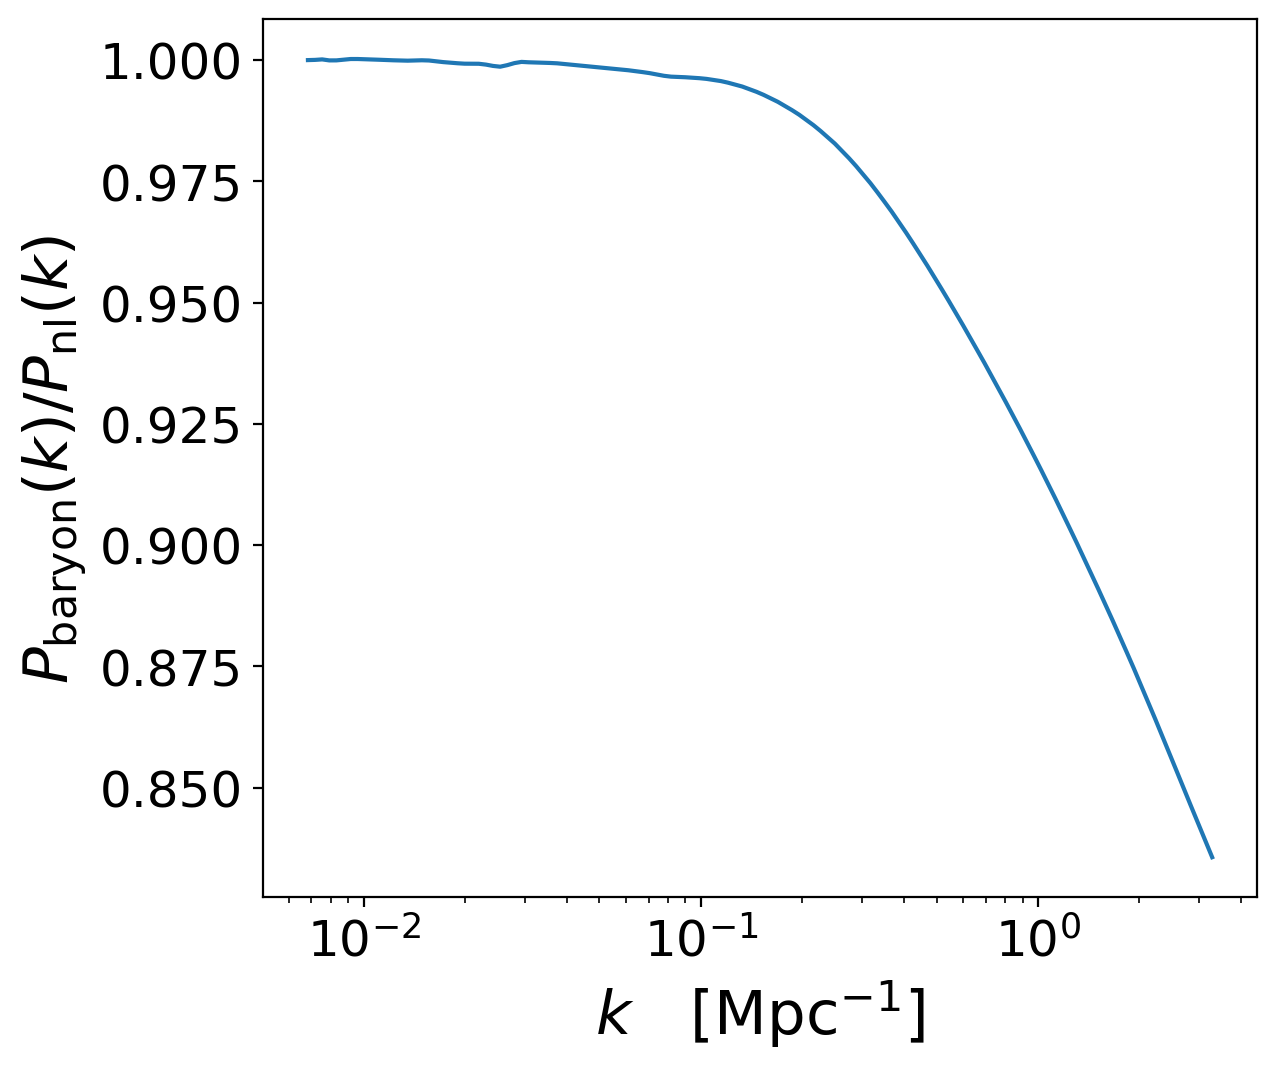

In [11]:
plt.plot(k_bemu, pk2d_bcm(k_bemu, a) / pk2d_gro(k_bemu, a))

plt.xscale('log')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('$k\quad[\\rm Mpc^{-1}]$', fontsize=22)
plt.ylabel('$P_{\\rm baryon}(k)/P_{\\rm nl}(k)$', fontsize=22)

plt.tight_layout()
plt.show()

If you want to update the parameters, you can type

In [12]:
baryons.update_parameters(log10_M_c=12.7)

### MiraTitan

These below sentenses are based on https://github.com/LSSTDESC/CCLX/blob/master/Power%20spectrum%20example.ipynb

In [13]:
kmin, kmax, nk = 1e-4, 1e1, 128
k_cemu = np.logspace(np.log10(kmin), np.log10(kmax), nk) # Wavenumber [Mpc]^-1
a = 1. # Scale factor a z=0

In [14]:
cemu = ccl.CosmicemuMTIVPk("tot")
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.05, h=0.67, sigma8=0.8, n_s=0.96, 
                      Neff=3.04, transfer_function='boltzmann_class', matter_power_spectrum=cemu)

Notice we have one class for the 2017 emulator (which is the one CCL was using up to version 2). That's the MiraTitan II (hence the name MTII). Another class is available for the 2022 emulator (MTIV). For each of them there are emulators for the total matter power spectrum 'tot' (i.e. including neutrinos) or for CDM+baryons 'cb'. So you can choose amongst all these options:

In [15]:
#cemu = ccl.CosmicemuMTIIPk("tot")
#cemu = ccl.CosmicemuMTIIPk("cb")
#cemu = ccl.CosmicemuMTIVPk("tot")
#cemu = ccl.CosmicemuMTIVPk("cb")

Then we proceed as usual for obtaining the matter power spectrum.

In [16]:
# Plot linear and nonlinear power spectra
pk_lin_cemu = ccl.linear_matter_power(cosmo, k_cemu, a)
pk_nl_cemu = ccl.nonlin_matter_power(cosmo, k_cemu, a)

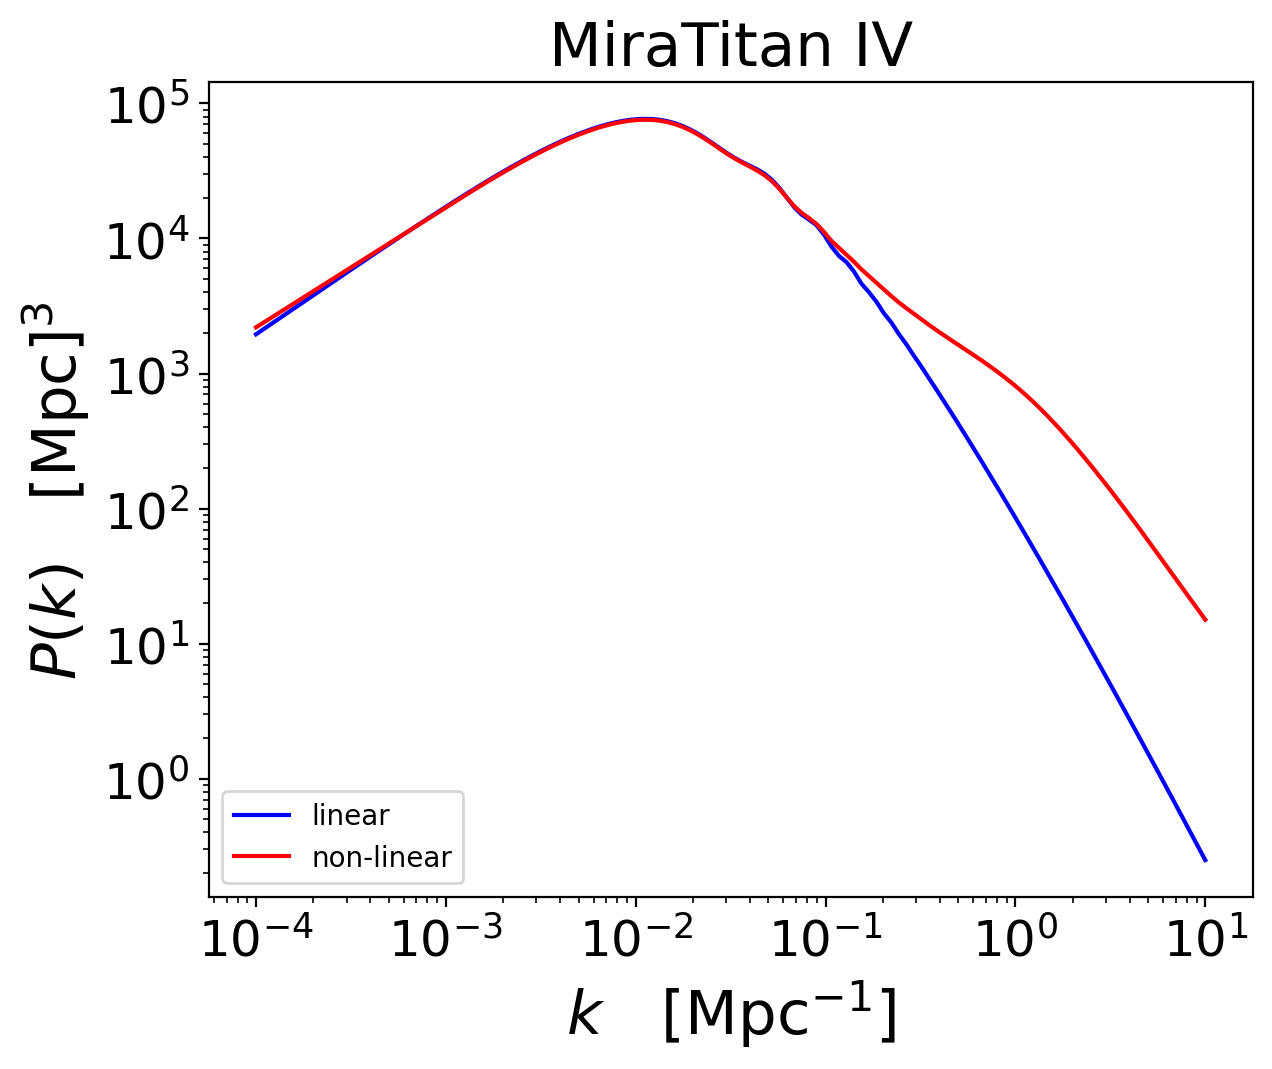

In [17]:
plt.plot(k_cemu, pk_lin_cemu, 'b-', label="linear")
plt.plot(k_cemu, pk_nl_cemu, 'r-', label="non-linear")

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='lower left',fontsize=10)
plt.xlabel('$k\quad[\\rm Mpc^{-1}]$', fontsize=22)
plt.ylabel('$P(k)\quad[{\\rm Mpc}]^3$', fontsize=22)
plt.title("MiraTitan IV", fontsize=22)

plt.tight_layout()
plt.show()